<a href="https://colab.research.google.com/github/RaphaelMarquesF/Apriori_BigFive/blob/main/Regras_de_associacao_Big_Five.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regras de associação no Big-Five

texto e código por **Raphael Marques**

*  Linked-in: https://www.linkedin.com/in/raphael-marques-f/ 
*  Instagram: https://www.instagram.com/raphael.marques.psi/ 

O presente arquivo contém,resumidamente, as seguintes partes:

*  Sobre o Big-Five: o que são os cinco fatores da personalidade;
*  Descrição do Arquivo: como está o arquivo, cabeçalho e dados;
*  Histogramas gerais dos cinco fatores: como está distribuido os cinco fatores pelos resultados;
*  Criando Tipos: trabalhando os dados para aplicar no algoritmo;
*  O Algoritmo Apriori: explicação do algoritmo;
*  Discussão: o que o resultado indica;

## Sobre o Big Five

O Big-Five é a medida de traços de personalidade mais bem aceitos atualmente. Chama-se Big-Five ou "Cinco Grandes" pois os traços são:

*  **Openness:** traduzido como "Abertura para experiencias". Indica o nível de abertura do indivíduo para novas experiências;
*  **Agreeableness:** traduzido como "Agradabilidade". Indica no nível de empatia, cooperação do indivíduo.
*   **Emotional Stability:** traduzido com "Estabilidade emocional" ou Neuroticismo, indica o nível de resistência ao estresse.
*  **Conscientiousness:** traduzido como "Conscienciosidade", indica tendencia para comportamentos disciplinados, ao comportamento planejado. 
*  **Extraversion:** traduzido como "Extroversão", a tendencia de envolvimento com o mundo exterior.


Fonte:
https://pt.wikipedia.org/wiki/Big_Five_(psicologia)

#Descrição do arquivo

Os dados de personalidade contêm o cabeçalho descrito a seguir:

**Userid**: A id do usuário.

**Openness**: uma pontuação de avaliação (de 1 a 7) avaliando a tendência do usuário de preferir novas experiências. 1 significa que o usuário tem tendência a NÃO preferir novas experiências, 7 significa que o usuário tem tendência a preferir novas experiências.

**Agreeableness**: uma pontuação de avaliação (de 1 a 7) avaliando a tendência do usuário de ser compassivo e cooperativo em vez de desconfiado e antagônico em relação aos outros. 1 significa que o usuário tem tendência a NÃO ser compassivo e cooperativo. 7 significa que o usuário tem tendência a ser compassivo e cooperativo.

**Emotional Stability**: uma pontuação de avaliação (de 1 a 7) avaliando a tendência do usuário a ter estresse psicológico. 1 significa que o usuário tem tendência a ter estresse psicológico e 7 significa que o usuário tem tendência a NÃO ter estresse psicológico.

**Conscientiousness**: uma pontuação de avaliação (de 1 a 7) avaliando a tendência do usuário de ser organizado e confiável e de mostrar autodisciplina. 1 significa que o usuário não tem essa tendência e 7 significa que o usuário tem essa tendência.

**Extraversion**:uma pontuação de avaliação (de 1 a 7) avaliando a tendência do usuário de ser extrovertido. 1 significa que o usuário não tem essa tendência e 7 significa que o usuário tem essa tendência.

**Assigned Metric**: um dos seguintes (serendipidade, popularidade, diversidade, padrão). Cada usuário, além de ser avaliado sua personalidade, foi avaliado suas preferências por uma lista de 12 filmes manipulados com acaso, popularidade, valor de diversidade ou nenhum (opção padrão).

**Assigned Condition**: um dos seguintes (alto, médio, baixo). Com base na métrica atribuída e nesta condição atribuída, a lista de filmes foi gerada para os usuários. Por exemplo: se a métrica atribuída for serendipidade e a condição atribuída for alta, os filmes na lista são altamente aleatórios. Documentamos como manipulamos a lista de filmes com base na condição atribuída e na métrica atribuída na página 6 de nosso artigo de pesquisa mencionado acima.

**Movie_x (x is from 1 to 12)**: A lista é composta por 12 filmes. Esses campos contêm os ids dos doze filmes da lista.

**Predictedratingx (x is from 1 to 12)**: a avaliação prevista do movie_x correspondente para o usuário.

**Is_Personalized**: A resposta do usuário à pergunta Esta lista é personalizada para mim. Os usuários responderam na escala Likert de 5 pontos. (1: Discordo totalmente, 5: Concordo totalmente).

**Enjoy_watching**: A resposta do usuário à pergunta Esta lista contém filmes que acho que gostei de assistir. Os usuários responderam na escala Likert de 5 pontos. (1: Discordo totalmente, 5: Concordo totalmente)

Link do artigo relacionado ao trabalho

https://link.springer.com/article/10.1007/s10796-017-9782-y

The ratings.csv file contains the header as described as follows:

userId: the hashed user_id.
movieId: the id of the movie that the user (corresponding to userId) rated.
rating: the rating (from 0.5 to 5 stars) provided by the user.
tstamp: when the user rated the movie.


Fonte: Kaggle

https://www.kaggle.com/arslanali4343/top-personality-dataset/notebooks

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
#abrindo o arquivo
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
source = "/content/drive/MyDrive/Colab Notebooks/BIG FIVE/2018-personality-data.csv"


##abrindo dados

In [4]:
# Abrindo no Pandas DataFrame
dados = pd.read_csv(source)


In [5]:
# 1834 linhas e 34 colunas
dados.shape 

(1834, 34)

In [6]:
# Cabeçalho
dados.head()

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,predicted_rating_3,movie_4,predicted_rating_4,movie_5,predicted_rating_5,movie_6,predicted_rating_6,movie_7,predicted_rating_7,movie_8,predicted_rating_8,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,95858,4.271995,115713,4.611922,26674,4.459407,93040,4.147292,117533,4.098206,108979,4.064843,112582,4.149100,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,1247,4.266540,953,4.211322,2010,4.408341,1234,4.090358,5291,4.202424,106642,4.113912,1209,4.094422,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,77658,4.710444,101895,5.029360,1260,4.698602,5971,4.660769,98491,4.962319,926,4.706864,1204,4.645191,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,2843,4.456451,3629,4.668444,3022,4.676067,3307,4.530360,1211,4.292660,3462,4.341634,5291,4.261166,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,2843,4.456451,3629,4.668444,3022,4.676067,3307,4.530360,1211,4.292660,3462,4.341634,5291,4.261166,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3


In [7]:
# Colunas
dados.columns


Index(['userid', ' openness', ' agreeableness', ' emotional_stability',
       ' conscientiousness', ' extraversion', ' assigned metric',
       ' assigned condition', ' movie_1', ' predicted_rating_1', ' movie_2',
       ' predicted_rating_2', ' movie_3', ' predicted_rating_3', ' movie_4',
       ' predicted_rating_4', ' movie_5', ' predicted_rating_5', ' movie_6',
       ' predicted_rating_6', ' movie_7', ' predicted_rating_7', ' movie_8',
       ' predicted_rating_8', ' movie_9', ' predicted_rating_9', ' movie_10',
       ' predicted_rating_10', ' movie_11', ' predicted_rating_11',
       ' movie_12', ' predicted_rating_12', ' is_personalized',
       ' enjoy_watching '],
      dtype='object')

##Renomeando Colunas

In [8]:
# Devido aos nomes conterem um espaço " " antes de algumas colunas e terem nomes grandes, renoomei as colunas
dados.rename(columns={'userid': 'ID', 
                      ' openness':'OPEN', 
                      ' agreeableness': 'AGREE', 
                      ' emotional_stability': 'EMOTION',
                      ' conscientiousness': 'CONS', 
                      ' extraversion': 'EXT', 
                      ' assigned metric': 'sig_metric',
                      ' assigned condition': 'sig_cond', 
                      ' movie_1': 'mov01', 
                      ' predicted_rating_1': 'pred01', 
                      ' movie_2': 'mov02',
                      ' predicted_rating_2': 'pred02', 
                      ' movie_3': 'mov03', 
                      ' predicted_rating_3': 'pred03', 
                      ' movie_4': 'mov04',
                      ' predicted_rating_4': 'pred04', 
                      ' movie_5': 'mov05', 
                      ' predicted_rating_5': 'pred05', 
                      ' movie_6': 'mov06',
                      ' predicted_rating_6': 'pred06', 
                      ' movie_7': 'mov07', 
                      ' predicted_rating_7': 'pred07', 
                      ' movie_8':'mov07',
                      ' predicted_rating_8': 'pred07',
                      ' movie_9': 'mov08', 
                      ' predicted_rating_9': 'pred08', 
                      ' movie_10': 'mov010',
                      ' predicted_rating_10': 'pred10', 
                      ' movie_11': 'mov11', 
                      ' predicted_rating_11': 'pred11',
                      ' movie_12': 'mov12', 
                      ' predicted_rating_12': 'pred12', 
                      ' is_personalized': 'is_personalized',
                      ' enjoy_watching ': 'enjoy_watching '},inplace= True)



In [9]:
# Verificando colunas renomeadas
dados.columns

Index(['ID', 'OPEN', 'AGREE', 'EMOTION', 'CONS', 'EXT', 'sig_metric',
       'sig_cond', 'mov01', 'pred01', 'mov02', 'pred02', 'mov03', 'pred03',
       'mov04', 'pred04', 'mov05', 'pred05', 'mov06', 'pred06', 'mov07',
       'pred07', 'mov07', 'pred07', 'mov08', 'pred08', 'mov010', 'pred10',
       'mov11', 'pred11', 'mov12', 'pred12', 'is_personalized',
       'enjoy_watching '],
      dtype='object')

#Histogramas gerais dos cinco fatores

In [11]:
sns.set_palette('Oranges');

NameError: ignored

In [12]:
# Openness
sns.displot(dados, x ="OPEN",bins = 25);


NameError: ignored

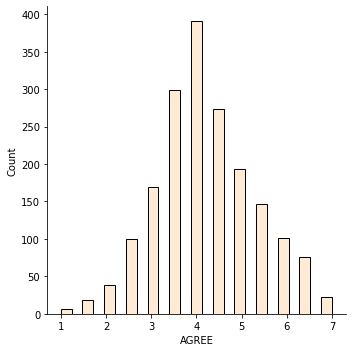

In [ ]:
# Agreeableness
sns.displot(dados, x ="AGREE",bins = 25);

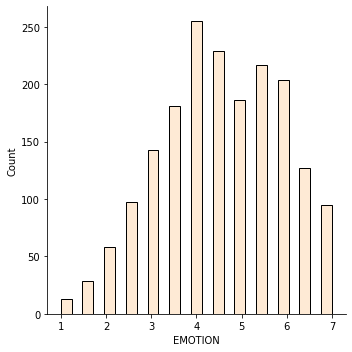

In [ ]:
# Emotional - Stability
sns.displot(dados, x ="EMOTION",bins = 25); 

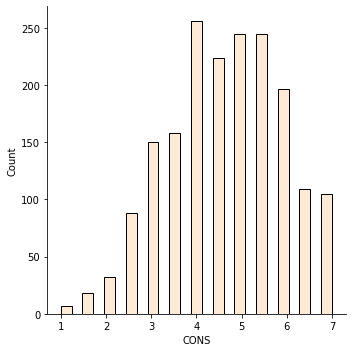

In [ ]:
# Consciousness
sns.displot(dados, x ="CONS",bins = 25); 

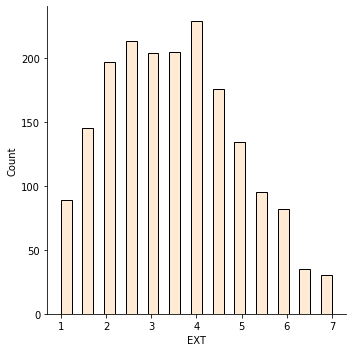

In [ ]:
# Extraversion
sns.displot(dados, x ="EXT",bins = 25); 

#Criando Tipos

## Trabalhando dados para Apriori

In [13]:
# Escolhendo as colunas do arquivo que contém apenas os dados do Big-Five
big_five = ['OPEN','AGREE','EMOTION', 'CONS', 'EXT']
personalidades = dados[big_five]

'''
Dados em formato numérico serão transformados num formato Inicial do do Fator+Número
Deste modo facilitará o trabalho com o algortimo apriori que diferenciará cada nota de cada coluna
'''

'\nDados em formato numérico serão transformados num formato Inicial do do Fator+Número\nDeste modo facilitará o trabalho com o algortimo apriori que diferenciará cada nota de cada coluna\n'

In [14]:
personalidades #verificando como fica o data frame

,OPEN,AGREE,EMOTION,CONS,EXT
0,5.0,2.0,3.0,2.5,6.5
1,7.0,4.0,6.0,5.5,4.0
2,4.0,3.0,4.5,2.0,2.5
3,5.5,5.5,4.0,4.5,4.0
4,5.5,5.5,3.5,4.5,2.5
...,...,...,...,...,...
1829,5.5,3.5,2.5,4.0,5.5
1830,4.0,3.5,4.5,4.0,2.5
1831,6.0,3.0,5.5,3.5,6.0
1832,5.0,3.5,1.5,3.5,2.5


In [17]:
personalidades.mean() # Médias dos valores

OPEN       5.376499
AGREE      4.215921
EMOTION    4.561614
CONS       4.662486
EXT        3.485551
dtype: float64

In [35]:
# transformando colunas em listas
lista_open = personalidades['OPEN'].tolist()
lista_agree = personalidades['AGREE'].tolist()
lista_emotion = personalidades['EMOTION'].tolist()
lista_cons = personalidades['CONS'].tolist()
lista_ext = personalidades['EXT'].tolist()

#listas vazias para adicionar strings
bf_open = [] 
bf_agree = [] 
bf_emotion = [] 
bf_cons = [] 
bf_ext = [] 

# transformando colunas em strings + inicial do fator(Big-Five)
for x in lista_open:
  x = str(x)
  bf_open.append(x + 'O')

for x in lista_agree:
  x = str(x)
  bf_agree.append(x + 'A')

for x in lista_emotion:
  x = str(x)
  bf_emotion.append(x + 'E')

for x in lista_cons:
  x = str(x)
  bf_cons.append(x + 'C')

for x in lista_ext:
  x = str(x)
  bf_ext.append(x + 'V')
   
'''
Ou seja, 

O para Openness
A para Agreeableness
E para Emotional Stability
C para Consciousness
V para Extraversion

'''

'\nOu seja, \n\nO para Openness\nA para Agreeableness\nE para Emotional Stability\nC para Consciousness\nV para Extraversion\n\n'

In [ ]:
bf_open

In [20]:
# transformando num DataFrame novamente
df = pd.DataFrame(list(zip(bf_open, bf_agree,bf_emotion,bf_cons,bf_ext)), 
               columns =['Open', 'Agree','Emotion','Cons','Extv']) 
df

,Open,Agree,Emotion,Cons,Extv
0,5.0O,2.0A,3.0E,2.5C,6.5V
1,7.0O,4.0A,6.0E,5.5C,4.0V
2,4.0O,3.0A,4.5E,2.0C,2.5V
3,5.5O,5.5A,4.0E,4.5C,4.0V
4,5.5O,5.5A,3.5E,4.5C,2.5V
...,...,...,...,...,...
1829,5.5O,3.5A,2.5E,4.0C,5.5V
1830,4.0O,3.5A,4.5E,4.0C,2.5V
1831,6.0O,3.0A,5.5E,3.5C,6.0V
1832,5.0O,3.5A,1.5E,3.5C,2.5V


# O algoritmo Apriori

O algoritmo apriori é um algoritmo de regra de associação, que de maneira geral, cria regras de associação entre itens numa lista.

No caso as regras foram criadas na pontuação de cada fator.

Por exemplo:

"Dado que uma pessoa pontuou 6 no item Openness, quais pontuações mais prováveis em Agreeableness" ?

Obviamente que o participante poderia pontuar de 1 a 7, mas neste caso a pergunta é mais específica. Quando ele pontua um valor em uma fator, qual o provável fator na outra ?

As medidas do do algoritmo são:

**Support**
O suporte é uma indicação da frequência (em porcentagem)com que o conjunto de itens aparece no conjunto de dados.

**Confidence**
A confiança é uma indicação de quantas vezes a regra foi considerada verdadeira.
"Se A ocorreu, qual a chance(%) de B ocorrer?"

**Lift**
A medida de Lift indica qual a chance de B ocorrer, se A ocorrer. Se for maior ou igual a 1 então é provável de ocorrer.


# Executando algoritmo Apriori

In [22]:
pip install apyori


  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5977 sha256=41cd38904e7a3ec58ed02abf5e215fd44be18f4beb4287fe781f9e59d662849e
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [23]:
# verificando a forma: 1834 linhas e 5 colunas
df.shape

(1834, 5)

In [24]:
# lista vazia para inserir os valores do data frame em formato de array(matriz)
tipos = []

In [25]:
for i in range(0,1834):
   tipos.append([str(df.values[i,j]) for j in range(0,5)])

In [26]:
len(tipos)

1834

##Regras Apriori e Parâmetros

In [27]:
# Importando o algoritmo
from apyori import apriori 

In [46]:
# Criação de Regras de Associação pelo algoritmo
# parametros do algoritmo apriori
regras = apriori(tipos, 
                 min_support=0.0085, 
                 min_confidence= 0.25, 
                 min_lift=2, 
                 min_length= 5)

In [47]:
# Transformando em listas
resultados = list(regras)

In [48]:
# Verificando quantidade de regras geradas
len(resultados)

9

In [49]:
resultados_2 = [list(x) for x in resultados]


In [50]:

df_apriori = pd.DataFrame(resultados_2)

In [51]:
# O Resultado do algoritmo
df_apriori

,0,1,2
0,"(6.5A, 6.0E)",0.010360,"[((6.5A), (6.0E), 0.25, 2.247549019607843)]"
1,"(4.0A, 4.0E, 4.0C)",0.010360,"[((4.0A, 4.0C), (4.0E), 0.2835820895522388, 2...."
2,"(4.0A, 4.0O, 4.0C)",0.008724,"[((4.0A, 4.0O), (4.0C), 0.4102564102564103, 2...."
3,"(4.0A, 4.0C, 4.0V)",0.010905,"[((4.0A, 4.0C), (4.0V), 0.29850746268656714, 2..."
4,"(4.0A, 4.0O, 4.0E)",0.010905,"[((4.0A, 4.0E), (4.0O), 0.30303030303030304, 3..."
5,"(4.0A, 4.0E, 4.0V)",0.010360,"[((4.0A, 4.0E), (4.0V), 0.28787878787878785, 2..."
6,"(4.0O, 4.0E, 4.0C)",0.009269,"[((4.0E, 4.0C), (4.0O), 0.41463414634146345, 5..."
7,"(4.0E, 4.0C, 4.0V)",0.008724,"[((4.0E, 4.0C), (4.0V), 0.3902439024390244, 3...."
8,"(4.5V, 6.0O, 4.5A)",0.008724,"[((4.5V, 4.5A), (6.0O), 0.36363636363636365, 2..."


In [52]:
# Regras encontradas
print(df_apriori.loc[:][0])

0          (6.5A, 6.0E)
1    (4.0A, 4.0E, 4.0C)
2    (4.0A, 4.0O, 4.0C)
3    (4.0A, 4.0C, 4.0V)
4    (4.0A, 4.0O, 4.0E)
5    (4.0A, 4.0E, 4.0V)
6    (4.0O, 4.0E, 4.0C)
7    (4.0E, 4.0C, 4.0V)
8    (4.5V, 6.0O, 4.5A)
Name: 0, dtype: object


#Discussão

Com a alteração dos parametros dos algoritmo foi possível encontrar até 290 regras porém este número não é muito útil. Com algumas alteracoes, valores entre 7 e 9 regras parecem interessantes.

A regra da linha 3 indica, de maneira geral, que:
**Se a pontuação for 4.0 em Agradabilidade, o indivíduo tende a pontuar 4.0 em Conscienciosidade e 4 em Extraversão.** 

Esteresultado pode indicar um tipo de personalidade, como é indicado em alguns estudos,portanto, tende a ser comum encontrar este padrão, ou algo bem próximo disso nos resultados.

O próximo passo é aplicar outros algoritmos para explorar melhor estas relações encontradas também seria interessante verificar este padrão em estudos e outros resultados.

Outra possibilidade é verificar o padrão encontrado nas notas dos usuários para as listas de filmes. 